# Understanding FSplus

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

import sys

sys.path.append('../src')

from Config.config import PATHS
from Utils.utils import GetMeasurements
from Utils.interaction import Performer
from Classes.cognitive_model_agents import FRAplus

import warnings
warnings.filterwarnings("ignore")

In [3]:
simulation_parameters = {
    "num_rounds":50,
    "num_episodes":500,
    "verbose":False
}
fixed_parameters = {
    "num_agents":2,
    "threshold":0.5
}
df_list = []

# Only Payoff
free_parameters = {
    "inverse_temperature":5,
    "bias":0,
    "learning_rate":0.2,
    "len_history":3,
    "c":0.7,
    "delta":0
}
df = Performer.sim(
    agent_class=FRAplus,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters
)
df["model"] = 'Payoff'
df_list.append(df.copy())

# Best fit Payoff+Attendance
free_parameters = {
    "inverse_temperature":5,
    "bias":0.8,
    "learning_rate":0.2,
    "len_history":3,
    "c":0.7,
    "delta":0
}
df = Performer.sim(
    agent_class=FRAplus,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters
)
df["model"] = 'Payoff+Attendance'
df_list.append(df.copy())


# Best fit FSplus
free_parameters = {
    "inverse_temperature":5,
    "bias":0.8,
    "learning_rate":0.2,
    "len_history":3,
    "c":0.7,
    "delta":0.9
}
df = Performer.sim(
    agent_class=FRAplus,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters
)
df["model"] = 'FSplus (delta=0.9)'
df_list.append(df.copy())


# Best fit FSplus
free_parameters = {
    "inverse_temperature":5,
    "bias":0.8,
    "learning_rate":0.2,
    "len_history":3,
    "c":0.7,
    "delta":0.1
}
df = Performer.sim(
    agent_class=FRAplus,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters
)
df["model"] = 'FSplus (delta=0.1)'
df_list.append(df.copy())


df3 = pd.concat(df_list, ignore_index=True)

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [4]:
df3['acc_score'] = df3['score'].rolling(window=10).mean()

In [6]:
gm = GetMeasurements(
    data=df3,
    measures=['efficiency', 'inequality'],
    T=20
)
df3_measures = gm.get_measurements()
df3_measures['efficiency'] += np.random.normal(0, 0.01, len(df3_measures))
df3_measures['inequality'] += np.random.normal(0, 0.01, len(df3_measures))

Text(0, 0.5, 'Bounded Efficiency')

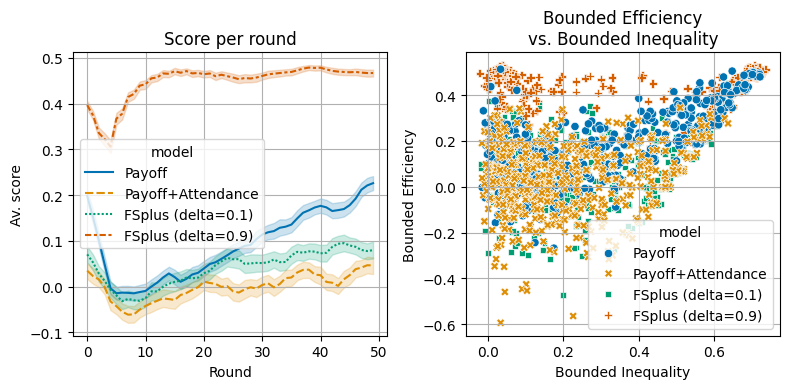

In [10]:
fig, axes = plt.subplots(
    1, 2,
    figsize=(8, 4),
    tight_layout=True,
    sharex=False, sharey=False    
)

sns.lineplot(
    x='round', y='acc_score',
    hue='model', style='model',
    hue_order=['Payoff', 'Payoff+Attendance', 'FSplus (delta=0.1)', 'FSplus (delta=0.9)'],
    style_order=['Payoff', 'Payoff+Attendance', 'FSplus (delta=0.1)', 'FSplus (delta=0.9)'],
    palette='colorblind',
    data=df3,
    ax=axes[0]
)
axes[0].grid()
axes[0].set_title("Score per round")
axes[0].set_xlabel("Round")
axes[0].set_ylabel("Av. score")

sns.scatterplot(
    x='inequality', y='efficiency',
    hue='model', style='model',
    hue_order=['Payoff', 'Payoff+Attendance', 'FSplus (delta=0.1)', 'FSplus (delta=0.9)'],
    style_order=['Payoff', 'Payoff+Attendance', 'FSplus (delta=0.1)', 'FSplus (delta=0.9)'],
    palette='colorblind',
    data=df3_measures,
    ax=axes[1]
)
axes[1].grid()
axes[1].set_title("Bounded Efficiency\nvs. Bounded Inequality")
axes[1].set_xlabel("Bounded Inequality")
axes[1].set_ylabel("Bounded Efficiency")


In [13]:
def softmax(b):
    m = np.max(b)
    x = b - m
    numerator = np.exp(x)
    denominator = np.sum(numerator)
    return numerator / denominator

gammas = [0.1, 0.5, 1, 5]
for gamma in gammas:
    print(softmax([0, gamma]))

[0.47502081 0.52497919]
[0.37754067 0.62245933]
[0.26894142 0.73105858]
[0.00669285 0.99330715]
